In [1]:
from IPython.core.display import HTML
styles = open( '../styles/custom.css', 'r' ).read()
HTML( styles )

In [2]:
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import seaborn as sns; sns.set()

In [3]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_classification

X, y = make_classification( n_samples = 100, n_features = 7, n_informative = 4, n_classes = 4, random_state = 0,
#                             shift = [ 45.0, 60.0, 50.0, 26.0, 28.0, 70.0, 34.0 ],
                           shift = [ 50.0,    # outside_humidity
                                     55.0,    # inside_humidity
                                     25.0,    # outside_temp
                                     30.0,    # baby_temp
                                     27.0,    # inside_temp
                                     60.0,    # baby_activity
                                     80.0    # intensity_illum
                                   ],
#              순서 : outside_humidity, inside_humidity, outside_temp, baby_temp, inside_temp, baby_activity, intensity_illum
                          )

df = pd.DataFrame( X, columns = [ 'outside_temp', 'outside_humidity',
                                  'inside_temp', 'inside_humidity',
                                  'intensity_illum',
                                  'baby_activity', 'baby_temp' ] )

df_y = pd.DataFrame( y, columns = [ 'baby_status' ] )
df_merged = df.merge( df_y, how = 'inner', left_index = True, right_index = True )
df_merged.to_csv( path_or_buf = 'generated_data.csv', sep = ',', header = True, index = False )
df.describe()

,outside_temp,outside_humidity,inside_temp,inside_humidity,intensity_illum,baby_activity,baby_temp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,79.841108,50.037146,26.577063,30.530535,54.956346,25.047252,59.854384
std,1.026605,1.433594,1.375644,1.548698,1.580330,1.364397,1.990847
min,77.106380,46.393623,22.977868,27.136781,51.691362,21.456148,53.372413
25%,79.023075,48.970086,25.504006,29.498332,53.673229,24.186162,58.785040
50%,79.924237,50.045462,26.621699,30.284280,54.807710,25.140513,60.272295
75%,80.587748,51.108324,27.318464,31.644733,56.038104,26.058263,61.236930
max,82.283522,53.496350,29.950944,34.632392,58.851915,28.140101,63.535062


In [5]:
df.head()

,outside_temp,outside_humidity,inside_temp,inside_humidity,intensity_illum,baby_activity,baby_temp
0,78.734100,48.317807,26.222742,30.577970,53.491415,25.110346,59.069094
1,79.842935,50.521042,25.508228,31.172234,53.359281,25.257396,60.922846
2,80.980324,48.493077,27.268886,29.196781,53.686353,24.560503,59.258248
3,80.034022,49.319980,27.216150,29.135494,53.443091,25.101767,60.618082
4,78.610739,49.072625,28.524592,28.571875,55.389851,26.485134,61.014172


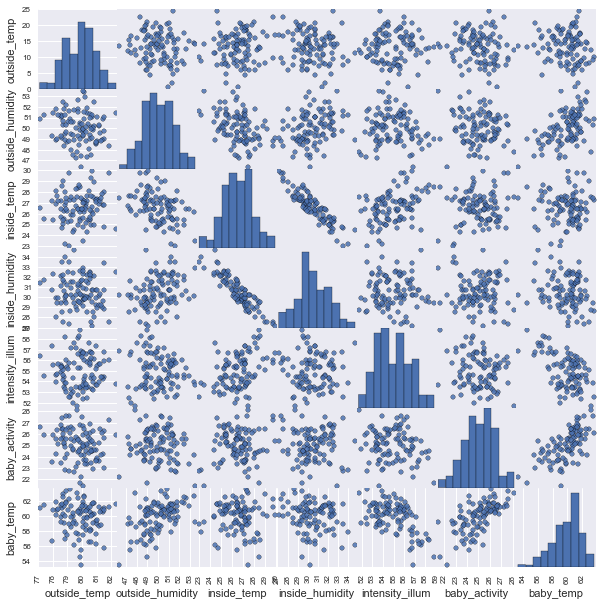

In [6]:
_ = scatter_matrix(df, alpha=0.85, figsize=(10, 10), diagonal='hist', grid = True, marker = 'o' )

In [8]:
from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier( max_depth = 5 )
clf = DecisionTreeClassifier()
clf.fit( X, y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [26]:
from sklearn.tree import export_graphviz
from sklearn import tree
import subprocess

def visualize_tree( clf, p_feature_names ) :
    dot_file = 'test.dot'
    png_file = 'test.png'
    tree.export_graphviz( clf, out_file = dot_file, feature_names = p_feature_names )
    command = [ 'dot', '-Tpng', dot_file, '-o', png_file ]

    try :
        subprocess.check_call( command )
    except :
        print( 'exception' )
        
visualize_tree( clf, df.columns.values )

<img src='test.png' width = "100%"/>

In [38]:
# decision tree와 feature names을 받아, if~ else 형태의 pseudo-code를 인쇄한다
def get_code( tree, feature_names ) :
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [ feature_names[i] for i in tree.tree_.feature ]
    value = tree.tree_.value

    f = open( 'decision_tree.output', 'w' )
    
    def recurse( left, right, threshold, features, node, f ):
        if threshold[ node ] != -2 :
            print( "if ( " + features[ node ] + " <= " + str( threshold[ node ] ) + " ) {" )
            f.write( "if ( " + features[ node ] + " <= " + str( threshold[ node ] ) + " ) {\n" )
            if left[ node ] != -1:
                recurse( left, right, threshold, features,left[ node ], f )
            print( "} else {" )
            f.write( "} else {\n" )
            if right[ node ] != -1:
                recurse( left, right, threshold, features,right[ node ], f )
            print( "}" )
            f.write( "}\n" )
        else:
            print( "// return " + str( value[ node ] ) + '\t// return data distribution' )
            print( "return " + str( np.argmax( value[ node ] ) ) + '\t// return assigned classes categorical index' )
            
            f.write( "// return " + str( value[ node ] ) + '\t// return data distribution\n' )
            f.write( "return " + str( np.argmax( value[ node ] ) ) + '\t// return assigned classes categorical index\n' )
    
    recurse( left, right, threshold, features, 0, f )
    
    f.close()

get_code( clf, df.columns.values )

if ( outside_humidity <= 60.7431678772 ) {
if ( intensity_illum <= 49.8926773071 ) {
if ( inside_humidity <= 55.6392631531 ) {
if ( inside_temp <= 27.8252716064 ) {
// return [[  0.   0.   0.  10.]]	// return data distribution
return 3	// return assigned classes categorical index
} else {
if ( inside_humidity <= 53.9906578064 ) {
if ( baby_temp <= 25.9117774963 ) {
if ( inside_humidity <= 53.8209190369 ) {
// return [[ 0.  0.  1.  0.]]	// return data distribution
return 2	// return assigned classes categorical index
} else {
// return [[ 1.  0.  0.  0.]]	// return data distribution
return 0	// return assigned classes categorical index
}
} else {
// return [[ 20.   0.   0.   0.]]	// return data distribution
return 0	// return assigned classes categorical index
}
} else {
if ( inside_temp <= 28.6027030945 ) {
if ( baby_temp <= 26.6225757599 ) {
if ( baby_activity <= 81.5334320068 ) {
if ( inside_temp <= 28.2152137756 ) {
if ( inside_temp <= 28.1811981201 ) {
if ( outside_temp <= 30.69207